In [ ]:
#Import the libaries

import numpy as np
import pandas as pd
from pathlib import Path
import itertools
from itertools import zip_longest
from collections import Counter
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
from itertools import zip_longest

### Import the data from local

In [ ]:
# Load parquet
parquet_path = Path(
    r"C:Local_folder"
) / "dataset_risk_AKI_full_formatted.parquet"

df = pd.read_parquet(parquet_path)

print(f"Loaded {len(df_version10):,} rows × {len(df.columns)} columns")
df.head()

In [7]:
# Display DataFrame structure and dtypes
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 51145655 entries, 0 to 545496
Data columns (total 32 columns):
 #   Column              Dtype  
---  ------              -----  
 0   subject_id          Int64  
 1   hadm_id             Int64  
 2   n_diag_codes        Int64  
 3   diag_seq_nums       float64
 4   diag_icd_codes      object 
 5   diag_icd_versions   float64
 6   outcome_aki         Int64  
 7   n_med_admin_events  Int64  
 8   meds_admin          object 
 9   med_event_texts     object 
 10  n_hcpcs_events      Int64  
 11  hcpcs_codes         object 
 12  hcpcs_event_desc    object 
 13  hcpcs_cat           object 
 14  hcpcs_cat_desc      object 
 15  n_icd_procs         Int64  
 16  icd_proc_codes      object 
 17  time_in_hospital    Int64  
 18  admission_type      object 
 19  admission_location  object 
 20  discharge_location  object 
 21  insurance           object 
 22  language            object 
 23  marital_status      object 
 24  race                object 
 

subject_id          hadm_id  n_diag_codes  diag_seq_nums  \
count       51145655.0       51145655.0    51145655.0   6.364488e+06   
mean   14997233.678789  24995569.996831     19.494404   8.825529e+00   
std     2882542.359293   2882060.788131     10.097776   6.858762e+00   
min         10000032.0       20000019.0           1.0   1.000000e+00   
25%         12488220.0       22505003.0          11.0   4.000000e+00   
50%         15004302.0       24998068.0          18.0   7.000000e+00   
75%         17512455.0       27470414.0          27.0   1.200000e+01   
max         19999987.0       29999935.0          57.0   3.900000e+01   

       diag_icd_versions  outcome_aki  n_med_admin_events  n_hcpcs_events  \
count       6.364488e+06   51145655.0          43745993.0       4816203.0   
mean        9.542973e+00     0.262588          670.887778        1.337075   
std         4.981499e-01     0.440041         1306.308088        0.862062   
min         9.000000e+00          0.0                 1.0             1.0   
25%         9.000000e+00          0.0               117.0             1.0   
50%         1.000000e+01          0.0               291.0             1.0   
75%         1.000000e+01          1.0               733.0             1.0   
max         1.000000e+01          1.0             27890.0            15.0   

       n_icd_procs  time_in_hospital  n_lab_events   icu_stays      icu_days  \
count   36957124.0        51145655.0    48514547.0  18003767.0  1.799601e+07   
mean      5.526682         16.485594    763.736102    1.353579  1.112920e+01   
std       6.022129         27.067796   1429.413171    0.791776  1.893505e+01   
min            1.0               0.0           1.0         1.0  1.250000e-03   
25%            2.0               4.0         114.0         1.0  1.956852e+00   
50%            3.0               8.0         299.0         1.0  4.650938e+00   
75%            7.0              19.0         789.0         1.0  1.267160e+01   
max           41.0             515.0       21655.0        10.0  2.265375e+02   

       n_omr_events           BMI        Weight  
count    46783128.0  1.003173e+07  1.139785e+07  
mean     132.864768  3.158517e+01  1.061121e+03  
std      181.876149  7.125062e+02  4.269477e+05  
min             1.0  0.000000e+00  0.000000e+00  
25%            12.0  2.430000e+01  1.450000e+02  
50%            58.0  2.820000e+01  1.720000e+02  
75%           185.0  3.330000e+01  2.070000e+02  
max          2442.0  3.216971e+05  2.102378e+08

In [8]:
# Count null values in each column
null_counts = df.isnull().sum()

print(null_counts)

subject_id                   0
hadm_id                      0
n_diag_codes                 0
diag_seq_nums         44781167
diag_icd_codes        44781167
diag_icd_versions     44781167
outcome_aki                  0
n_med_admin_events     7399662
meds_admin            11727998
med_event_texts       10190612
n_hcpcs_events        46329452
hcpcs_codes           46329452
hcpcs_event_desc      46329452
hcpcs_cat             46329452
hcpcs_cat_desc        46329452
n_icd_procs           14188531
icd_proc_codes        50286225
time_in_hospital             0
admission_type               0
admission_location         168
discharge_location     4898387
insurance               338837
language                 29405
marital_status         2392390
race                         0
n_lab_events           2631108
icu_stays             33141888
icu_days              33149647
n_omr_events           4362527
BMI                   41113927
Weight                39747805
BP                    37003438
dtype: i

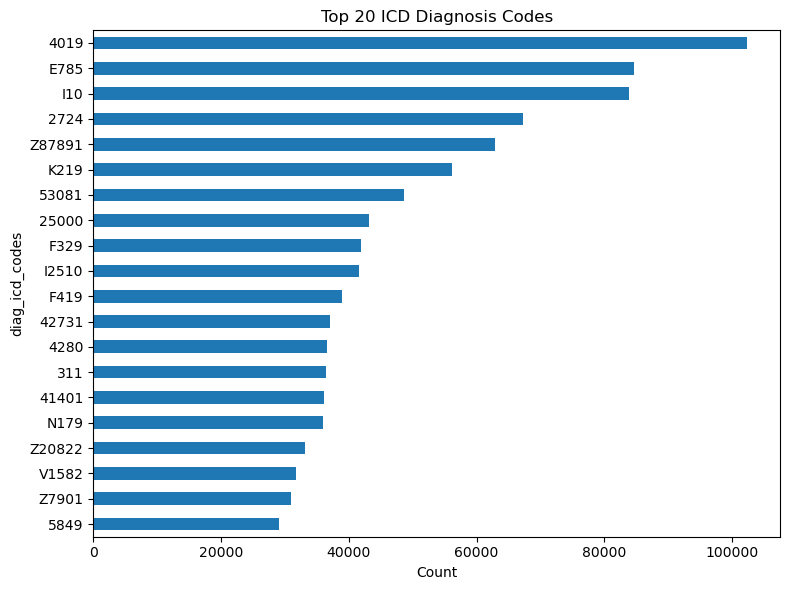

In [3]:
# Top 20 ICD code
top20 = df['diag_icd_codes'].value_counts().head(20)

top20.sort_values().plot.barh(figsize=(8, 6))
plt.title('Top 20 ICD Diagnosis Codes')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

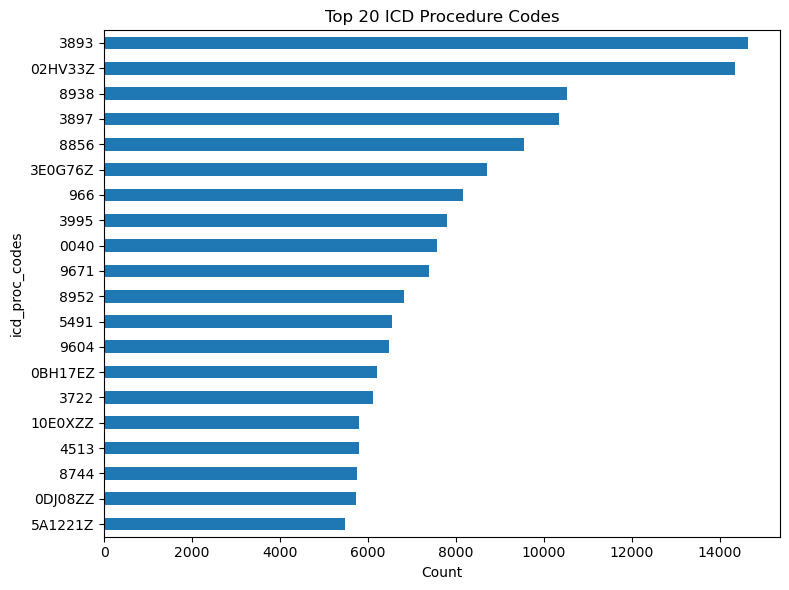

In [3]:
# Top 20 ICD Procedures
top20_procs = df['icd_proc_codes'].value_counts().head(20)

top20_procs.sort_values().plot.barh(figsize=(8, 6))
plt.title('Top 20 ICD Procedure Codes')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

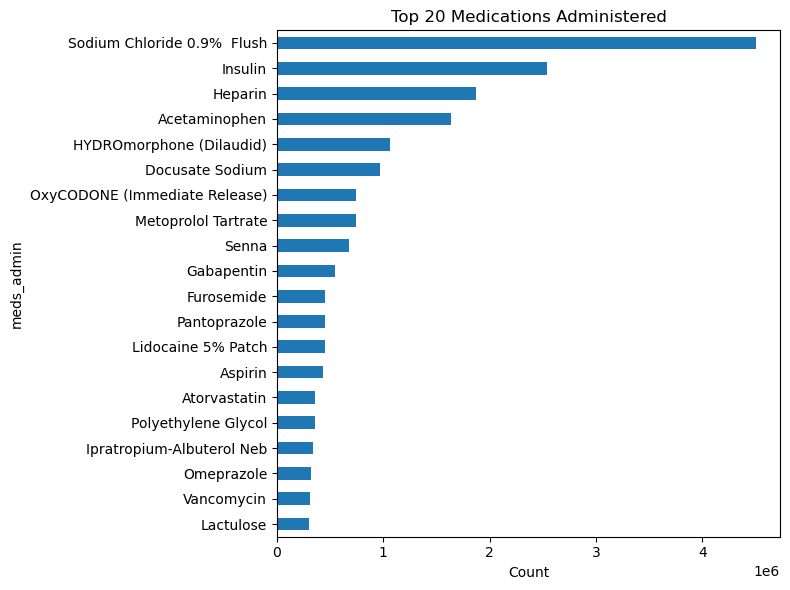

In [4]:
# Top 20 Medications Administered
top20_meds = df['meds_admin'].value_counts().head(20)

top20_meds.sort_values().plot.barh(figsize=(8, 6))
plt.title('Top 20 Medications Administered')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

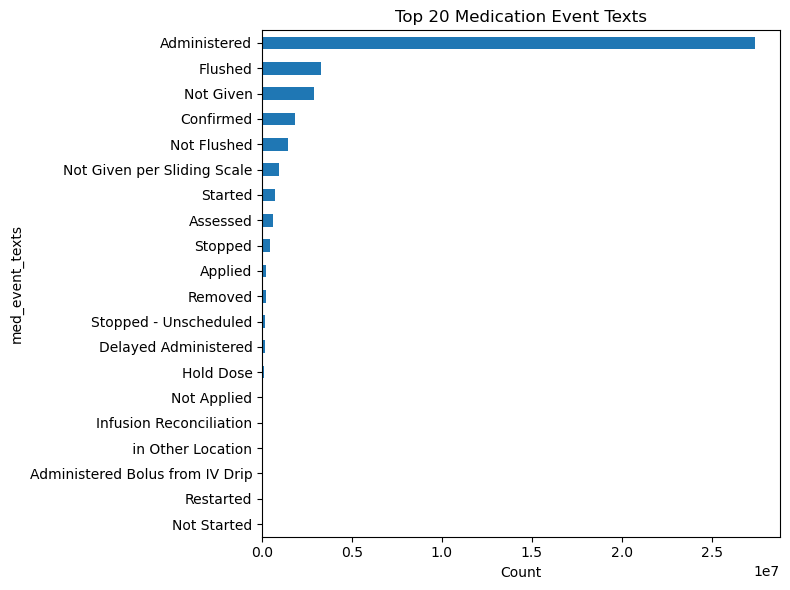

In [5]:
# Top 20 Medications event texts
top20_events = df['med_event_texts'].value_counts().head(20)

top20_events.sort_values().plot.barh(figsize=(8, 6))
plt.title('Top 20 Medication Event Texts')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

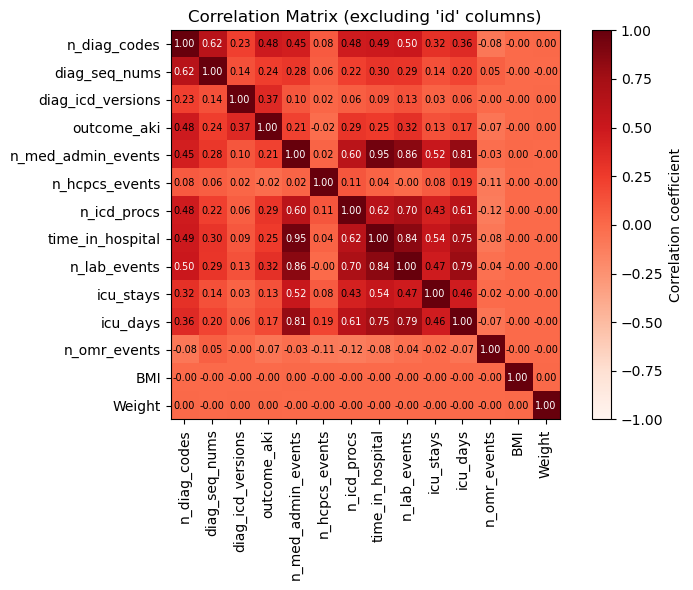

In [6]:
# 1) Correlation Matrix (excluding 'id' columns)
numeric_cols = [
    col for col in df.select_dtypes(include=[np.number]).columns
    if "id" not in col.lower()
]

corr = df[numeric_cols].corr()

valid = corr.columns[corr.notna().any(axis=1)]
corr = corr.loc[valid, valid]

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(corr, cmap='Reds', vmin=-1, vmax=1)
fig.colorbar(cax, label="Correlation coefficient")

ax.set_xticks(range(len(valid)))
ax.set_xticklabels(valid, rotation=90)
ax.set_yticks(range(len(valid)))
ax.set_yticklabels(valid)

ax.xaxis.set_ticks_position("bottom")
ax.xaxis.tick_bottom()

for i in range(len(valid)):
    for j in range(len(valid)):
        val = corr.iat[i, j]
        ax.text(
            j, i, f"{val:.2f}",
            ha="center", va="center",
            color="white" if abs(val) > 0.5 else "black",
            fontsize=7
        )

plt.title("Correlation Matrix (excluding 'id' columns)")
plt.tight_layout()
plt.show()

### EDA for Objetive Variable (outcome_aki)

In [4]:
# filter rows where diag_icd_versions equals 10
df_version10 = df[df['diag_icd_versions'] == 10].copy()

In [ ]:
# Distribution of outcome_aki — df_version10 
counts1 = df_version10['outcome_aki'].value_counts().sort_index()
total1 = counts1.sum()

fig, ax1 = plt.subplots(figsize=(6, 4))
counts1.plot.bar(ax=ax1)

for p in ax1.patches:
    height = p.get_height()
    pct = height / total1 * 100
    ax1.annotate(f"{height} ({pct:.1f}%)",
                 (p.get_x() + p.get_width() / 2, height),
                 ha='center', va='bottom')

ax1.set_title('Distribution of outcome_aki — df_version10')
ax1.set_xlabel('outcome_aki')
ax1.set_ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
# Distribution of outcome_aki by unique subject_id
unique_counts1 = (
    df_version10
      .drop_duplicates(subset='subject_id')
      ['outcome_aki']
      .value_counts()
      .sort_index()
)
total_unique1 = unique_counts1.sum()
colors1 = ['lightgrey' if idx == 0 else 'yellow' for idx in unique_counts1.index]

ax1 = unique_counts1.plot.pie(
    figsize=(6, 6),
    colors=colors1,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    wedgeprops={'width': 0.3, 'edgecolor': 'white'}
)
ax1.set_ylabel('')
ax1.text(0, 0, f"{total_unique1:,}", ha='center', va='center', fontsize=14, fontweight='bold')
plt.title('Distribution of outcome_aki by unique subject_id — df_version10')
plt.tight_layout()
plt.show()


In [ ]:
# Top 10 Medications Administered (outcome_aki = 1)

top10_meds_aki1_v10 = df_version10.loc[df_version10['outcome_aki'] == 1, 'meds_admin'] \
                         .value_counts() \
                         .head(10)

top10_meds_aki1_v10.sort_values().plot.barh(figsize=(8, 6))
plt.title('Top 10 Medications Administered (outcome_aki = 1) — df_version10')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
# Average Time in Hospital (outcome_aki = 1)

avg_time_v10 = df_version10.loc[df_version10['outcome_aki'] == 1, 'time_in_hospital'].mean()

plt.figure(figsize=(6, 4))
plt.bar(['outcome_aki = 1'], [avg_time_v10])
plt.title('Average Time in Hospital — df_version10')
plt.ylabel('Average Days in Hospital')
plt.tight_layout()
plt.show()

In [ ]:
# compute unique hadm_id counts per subject for outcome_aki = 1

# df_version10
unique_hadm_counts_v10 = df_version10.loc[
    df_version10['outcome_aki'] == 1
].groupby('subject_id')['hadm_id'].nunique()

avg_unique_hadm_v10 = unique_hadm_counts_v10.mean()
print(f"Average unique hadm_id per subject (outcome_aki = 1) — df_version10: {avg_unique_hadm_v10:.2f}")

In [ ]:
# Average hospital admission events per subject

# df_version10
df_obj1_v10 = df_version10[df_version10['outcome_aki'] == 1]

unique_hadm_counts_v10 = df_obj1_v10.groupby('subject_id')['hadm_id'].nunique()
total_hadm_counts_v10  = df_obj1_v10.groupby('subject_id')['hadm_id'].count()

avg_unique_hadm_v10 = unique_hadm_counts_v10.mean()
avg_total_hadm_v10  = total_hadm_counts_v10.mean()

print(f"Average distinct hospital admissions per subject — df_version10: {avg_unique_hadm_v10:.2f}")
print(f"Average total hospital admission events per subject — df_version10: {avg_total_hadm_v10:.2f}")


In [ ]:
# Correlation Matrix for outcome_aki = 1 (excluding 'id' columns)

if 'outcome_aki' in df_version10.columns:
    numeric_cols = [
        col for col in df_version10.select_dtypes(include=[np.number]).columns
        if 'id' not in col.lower()
        and col not in ['diag_icd_versions', 'n_diag_codes', 'diag_seq_nums']  # <- columnas a excluir
    ]
    
    if 'outcome_aki' in numeric_cols:
        numeric_cols.remove('outcome_aki')
    numeric_cols.append('outcome_aki')

    corr_matrix = df_version10[numeric_cols].corr()

    corr_matrix = corr_matrix.dropna(axis=0, how='any').dropna(axis=1, how='any')

    cols = corr_matrix.columns.tolist()
    target_var = 'outcome_aki'
    target_idx = cols.index(target_var)

    fig, ax = plt.subplots(figsize=(12, 10))
    cax = ax.matshow(corr_matrix.values, cmap='Reds', vmin=-1, vmax=1)
    fig.colorbar(cax, label='Correlation coefficient')

    ax.set_xticks(range(len(cols)))
    ax.set_xticklabels(cols, rotation=90, fontsize=8)
    ax.set_yticks(range(len(cols)))
    ax.set_yticklabels(cols, fontsize=8)

    from matplotlib.patches import Rectangle
    n = len(cols)
    ax.add_patch(Rectangle((-0.5, target_idx - 0.5), n, 1, facecolor='yellow', alpha=0.3, edgecolor='none'))
    ax.add_patch(Rectangle((target_idx - 0.5, -0.5), 1, n, facecolor='yellow', alpha=0.3, edgecolor='none'))

    for lbl in ax.get_xticklabels():
        if lbl.get_text() == target_var:
            lbl.set_fontweight('bold')
    for lbl in ax.get_yticklabels():
        if lbl.get_text() == target_var:
            lbl.set_fontweight('bold')

    for i in range(len(cols)):
        for j in range(len(cols)):
            val = corr_matrix.iat[i, j]
            ax.text(j, i, f"{val:.2f}",
                    ha='center', va='center',
                    color='white' if abs(val) > 0.5 else 'black',
                    fontsize=7)

    plt.title('Correlation with outcome_aki — df_version10', pad=20)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'outcome_aki' not found in df_version10")

In [ ]:
# Define output path
output_path = Path(r"C:Local_folder") \
              / "dataset_risk_AKI_full_formatted_version10.parquet"

# Save DataFrame to Parquet
df_version10.to_parquet(output_path, index=False)

print(f"Saved formatted dataset to: {output_path}")

In [ ]:
############################################################################################

In [ ]:
############################################################################################

In [2]:
# Load parquet
parquet_path = Path(
    r"C:\Users\esnunez\OneDrive - Humano\Pictures\Analitica Avanzada-TIC\Datathon"
) / "dataset_risk_AKI_full_formatted_version10.parquet"

df_version10 = pd.read_parquet(parquet_path)

print(f"Loaded {len(df_version10):,} rows × {len(df_version10.columns)} columns")
df_version10.head()

Loaded 3,455,747 rows × 32 columns


subject_id   hadm_id  n_diag_codes  diag_seq_nums diag_icd_codes  \
0    10001843  26133978            38            1.0           A419   
1    10001843  26133978            38            2.0          J9601   
2    10001843  26133978            38            3.0          I5033   
3    10001843  26133978            38            4.0           J189   
4    10001843  26133978            38            5.0          J9602   

   diag_icd_versions  outcome_aki  n_med_admin_events  \
0               10.0            0                  58   
1               10.0            0                  58   
2               10.0            0                  58   
3               10.0            0                  58   
4               10.0            0                  58   

                    meds_admin med_event_texts  ...  language marital_status  \
0          Metoprolol Tartrate    Administered  ...   English         SINGLE   
1  Sodium Chloride 0.9%  Flush         Flushed  ...   English         SINGLE   
2                    LORazepam    Administered  ...   English         SINGLE   
3          Polyethylene Glycol    Administered  ...   English         SINGLE   
4                 Pantoprazole    Administered  ...   English         SINGLE   

    race n_lab_events icu_stays  icu_days n_omr_events   BMI Weight    BP  
0  WHITE          172         1  0.825266            3  30.6  189.0  None  
1  WHITE          172         1  0.825266            3   NaN    NaN  None  
2  WHITE          172         1  0.825266            3   NaN    NaN  None  
3  WHITE          172         1  0.825266            3   NaN    NaN  None  
4  WHITE          172         1  0.825266            3   NaN    NaN  None  

[5 rows x 32 columns]

In [ ]:
############################################################################################

### Transformations before to train the models

In [5]:
total_subjects = df_version10['subject_id'].nunique()
print("Total de subject_id únicos:", total_subjects)

Total de subject_id únicos: 122905


In [6]:
# Count null values in each column
null_counts = df_version10.isnull().sum()

print(null_counts)

subject_id                  0
hadm_id                     0
n_diag_codes                0
diag_seq_nums               0
diag_icd_codes              0
diag_icd_versions           0
outcome_aki                 0
n_med_admin_events      72129
meds_admin             177935
med_event_texts        163400
n_hcpcs_events        2893009
hcpcs_codes           2893009
hcpcs_event_desc      2893009
hcpcs_cat             2893009
hcpcs_cat_desc        2893009
n_icd_procs           1498503
icd_proc_codes        3069467
time_in_hospital            0
admission_type              0
admission_location          3
discharge_location     595809
insurance               30763
language                 1762
marital_status         135919
race                        0
n_lab_events           302466
icu_stays             2587727
icu_days              2588058
n_omr_events           320305
BMI                   1696420
Weight                1637729
BP                    1517762
dtype: int64


In [7]:
df_version10 = df_version10.fillna(0)
df_version10.fillna(0, inplace=True)

In [6]:
# Count null values in each column
null_counts = df_version10.isnull().sum()

print(null_counts)

subject_id            0
hadm_id               0
n_diag_codes          0
diag_seq_nums         0
diag_icd_codes        0
diag_icd_versions     0
outcome_aki           0
n_med_admin_events    0
meds_admin            0
med_event_texts       0
n_hcpcs_events        0
hcpcs_codes           0
hcpcs_event_desc      0
hcpcs_cat             0
hcpcs_cat_desc        0
n_icd_procs           0
icd_proc_codes        0
time_in_hospital      0
admission_type        0
admission_location    0
discharge_location    0
insurance             0
language              0
marital_status        0
race                  0
n_lab_events          0
icu_stays             0
icu_days              0
n_omr_events          0
BMI                   0
Weight                0
BP                    0
dtype: int64


### The next code first defines a helper function to impute the most frequent value in any series. It then categorizes each column of df_version10 according to the desired aggregation: averaging count-type columns, taking the maximum for clinical measures (BMI, Weight, BP), and imputing all other numeric or categorical columns with their mode. Finally, it groups the data by subject_id, applies the specified aggregations, and returns a new DataFrame where each subject appears exactly once with their aggregated and imputed values.

In [ ]:
def mode_impute(series: pd.Series):
    """
    Impute the most frequent value in a Series using value_counts to avoid mixed-type sorting issues.
    Returns NaN if the series is empty.
    """
    try:
        return series.value_counts().idxmax()
    except Exception:
        return np.nan

# -----------------------------
# 1. Define column groups by aggregation rule (exclude 'meds_admin' here)
# -----------------------------
count_cols = [
    'n_diag_codes',
    'n_med_admin_events',
    'n_hcpcs_events',
    'n_icd_procs',
    'n_lab_events',
    'n_omr_events'
]
max_cols = ['BMI', 'Weight', 'BP']

numeric_cols = df_version10.select_dtypes(include=np.number).columns.tolist()
other_numeric = [
    col for col in numeric_cols
    if col not in count_cols + max_cols + ['subject_id']
]

cat_cols = [
    col for col in df_version10.select_dtypes(include=['object', 'category']).columns
    if col != 'meds_admin'
]

# -----------------------------
# 2. Build aggregation mapping (including meds_admin now by mode)
# -----------------------------
agg_dict = {}

for col in count_cols:
    agg_dict[col] = 'mean'

for col in max_cols:
    agg_dict[col] = 'max'

for col in other_numeric:
    agg_dict[col] = mode_impute

for col in cat_cols:
    agg_dict[col] = mode_impute

# Impute meds_admin by its mode per subject
agg_dict['meds_admin'] = mode_impute

# -----------------------------
# 3. Aggregate all columns in one go
# -----------------------------
df_unique = (
    df_version10
      .groupby('subject_id')
      .agg(agg_dict)
      .reset_index()
)

# df_unique now has one row per subject_id, with:
# - mean of count columns
# - max of BMI, Weight, BP
# - mode-imputed other numeric and categorical columns (including meds_admin)


In [9]:
df_unique.head(10)

subject_id  n_diag_codes  n_med_admin_events  n_hcpcs_events  n_icd_procs  \
0    10000084           6.0                25.5             0.5          0.0   
1    10000117     11.363636           31.318182        0.818182     0.590909   
2    10000161           2.0                 8.0             1.0          0.0   
3    10000635           9.0                10.0             1.0          0.0   
4    10000947          13.0                52.0             0.0          1.0   
5    10000969           1.0                 0.0             1.0          0.0   
6    10000980     20.016949           66.661017             0.0          0.0   
7    10001401     18.496689           120.92053        0.172185     2.788079   
8    10001667          13.0                46.0             0.0          0.0   
9    10001843     31.490566           51.490566             0.0     0.849057   

   n_lab_events  n_omr_events   BMI  Weight      BP  ...  \
0         103.5           3.0  24.4   170.0       0  ...   
1     40.090909         141.0  20.8   125.0  110/70  ...   
2          36.0           2.0   0.0     0.0  147/83  ...   
3           0.0          27.0  37.1   230.0  140/86  ...   
4         164.0           0.0   0.0     0.0       0  ...   
5           0.0           0.0   0.0     0.0       0  ...   
6    114.728814         234.0  34.2   175.0  150/90  ...   
7     142.18543          96.0  32.0   198.0  160/70  ...   
8          34.0           3.0  21.6   121.0       0  ...   
9    132.943396           3.0  30.6   189.0       0  ...   

                    hcpcs_cat_desc  icd_proc_codes     admission_type  \
0                                0               0           EW EMER.   
1                                0               0  OBSERVATION ADMIT   
2  [Hospital observation services]               0     EU OBSERVATION   
3    [Hospital observation per hr]               0     EU OBSERVATION   
4                                0               0           EW EMER.   
5    [Hospital observation per hr]               0     EU OBSERVATION   
6                                0               0           EW EMER.   
7                                0               0  OBSERVATION ADMIT   
8                                0               0  OBSERVATION ADMIT   
9                                0               0             URGENT   

       admission_location        discharge_location  insurance  language  \
0   WALK-IN/SELF REFERRAL          HOME HEALTH CARE   Medicare   English   
1   WALK-IN/SELF REFERRAL          HOME HEALTH CARE   Medicaid   English   
2      PHYSICIAN REFERRAL                         0   Medicaid   English   
3   WALK-IN/SELF REFERRAL                         0   Medicare   English   
4  TRANSFER FROM HOSPITAL                      HOME    Private   English   
5      PHYSICIAN REFERRAL                         0   Medicaid   English   
6          EMERGENCY ROOM          HOME HEALTH CARE   Medicare   English   
7          EMERGENCY ROOM  SKILLED NURSING FACILITY   Medicare   English   
8  TRANSFER FROM HOSPITAL          HOME HEALTH CARE   Medicare   English   
9  TRANSFER FROM HOSPITAL                      DIED   Medicare   English   

  marital_status                    race                   meds_admin  
0        MARRIED                   WHITE                  Pramipexole  
1       DIVORCED                   WHITE                            0  
2         SINGLE                   WHITE                Dexamethasone  
3        WIDOWED  BLACK/AFRICAN AMERICAN                      Insulin  
4        MARRIED  BLACK/AFRICAN AMERICAN                Acetaminophen  
5         SINGLE                   WHITE                            0  
6        MARRIED  BLACK/AFRICAN AMERICAN  Sodium Chloride 0.9%  Flush  
7        MARRIED                   WHITE  Sodium Chloride 0.9%  Flush  
8       DIVORCED                   WHITE                      Insulin  
9         SINGLE                   WHITE  Sodium Chloride 0.9%  Flush  

[10 rows x 32 columns]

In [9]:
df_unique.describe

<bound method NDFrame.describe of         subject_id  n_diag_codes  n_med_admin_events  n_hcpcs_events  \
0         10000084           6.0                25.5             0.5   
1         10000117     11.363636           31.318182        0.818182   
2         10000161           2.0                 8.0             1.0   
3         10000635           9.0                10.0             1.0   
4         10000947          13.0                52.0             0.0   
...            ...           ...                 ...             ...   
122900    19999204          14.0               162.0             0.0   
122901    19999464           5.0                43.0             0.0   
122902    19999466           4.0                 4.0             1.0   
122903    19999784     10.345455           99.752727        0.065455   
122904    19999828     20.609756          483.268293             0.0   

        n_icd_procs  n_lab_events  n_omr_events   BMI  Weight      BP  ...  \
0               0.0    

In [10]:
df_unique.columns

Index(['subject_id', 'n_diag_codes', 'n_med_admin_events', 'n_hcpcs_events',
       'n_icd_procs', 'n_lab_events', 'n_omr_events', 'BMI', 'Weight', 'BP',
       'hadm_id', 'diag_seq_nums', 'diag_icd_versions', 'outcome_aki',
       'time_in_hospital', 'icu_stays', 'icu_days', 'diag_icd_codes',
       'med_event_texts', 'hcpcs_codes', 'hcpcs_event_desc', 'hcpcs_cat',
       'hcpcs_cat_desc', 'icd_proc_codes', 'admission_type',
       'admission_location', 'discharge_location', 'insurance', 'language',
       'marital_status', 'race', 'meds_admin'],
      dtype='object')

In [10]:
df_unique['outcome_aki'] = (df_unique['outcome_aki'] > 0).astype(int)
print(df_unique['outcome_aki'].unique())

[0 1]


In [11]:
counts = df_unique['outcome_aki'].value_counts().sort_index()
percentages = counts / counts.sum() * 100

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(counts.index.astype(str), counts.values, width=0.6)

for bar, count, pct in zip(bars, counts.values, percentages):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        count,
        f'{count}\n{pct:.1f}%',
        ha='center',
        va='bottom'
    )

ax.set_xlabel('outcome_aki')
ax.set_ylabel('Frecuencia')
ax.set_title('Frecuencia y porcentaje de outcome_aki')
plt.tight_layout()
plt.show()

In [12]:
import matplotlib.pyplot as plt

# Calcular conteos de valores no cero
counts = {
    'BMI': (df_unique['BMI'] != 0).sum(),
    'Weight': (df_unique['Weight'] != 0).sum()
}

labels = list(counts.keys())
values = list(counts.values())

# Crear gráfico de barras
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(labels, values)

# Agregar datalabels con el conteo
for bar, value in zip(bars, values):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        value,
        f'{value}',
        ha='center',
        va='bottom'
    )

ax.set_title('Count of Non-Zero Records for BMI and Weight')
ax.set_xlabel('Variable')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()


In [13]:
df_unique.drop(columns=['BMI'], inplace=True)

In [12]:
df_unique.columns

Index(['subject_id', 'n_diag_codes', 'n_med_admin_events', 'n_hcpcs_events',
       'n_icd_procs', 'n_lab_events', 'n_omr_events', 'Weight', 'BP',
       'hadm_id', 'diag_seq_nums', 'diag_icd_versions', 'outcome_aki',
       'time_in_hospital', 'icu_stays', 'icu_days', 'diag_icd_codes',
       'med_event_texts', 'hcpcs_codes', 'hcpcs_event_desc', 'hcpcs_cat',
       'hcpcs_cat_desc', 'icd_proc_codes', 'admission_type',
       'admission_location', 'discharge_location', 'insurance', 'language',
       'marital_status', 'race', 'meds_admin'],
      dtype='object')

In [ ]:
output_path = Path(r"C:df_unique") / "df_unique.csv"

df_unique.to_csv(output_path, index=False)

print(f"Saved DataFrame to: {output_path}")